## ET Data 

In [1]:
import netCDF4 as nc
import xarray as xr
import pandas as pd
import datetime
import numpy as np

In [2]:
## Import your Net CDF ET file ##
modet_path = 'data/payete_MOD16A2-061-ET/MOD16A2GF.061_500m_aid0001_v2.nc' # Where data will be written to
lbrb_modet = xr.open_dataset(modet_path, decode_times=False)

In [3]:
## View your Net CDF file ##
lbrb_modet

<xarray.Dataset>
Dimensions:     (time: 1104, ydim: 187, xdim: 336)
Coordinates:
  * time        (time) int32 0 8 16 24 32 40 ... 8721 8729 8737 8745 8753 8761
  * ydim        (ydim) float64 4.949e+06 4.949e+06 ... 4.864e+06 4.863e+06
  * xdim        (xdim) float64 -9.367e+06 -9.367e+06 ... -9.213e+06 -9.212e+06
Data variables:
    crs         int8 ...
    ET_500m     (time, ydim, xdim) float32 ...
    ET_QC_500m  (time, ydim, xdim) float32 ...
    PET_500m    (time, ydim, xdim) float32 ...
Attributes:
    title:        MOD16A2GF.061 for aid0001
    Conventions:  CF-1.6
    institution:  Land Processes Distributed Active Archive Center (LP DAAC)
    source:       AppEEARS v3.54
    references:   See README.md
    history:      See README.md

In [4]:
## convert integer to datetime ##
start_date = datetime.datetime(2000, 1, 1, 0, 0, 0)
time = []
int_range = lbrb_modet.time.values.astype(int)
display(int_range)
for i in range(len(int_range)):
  date = start_date + datetime.timedelta(days = int(int_range[i]))
  time.append(date)

lbrb_modet['time'] = time

array([   0,    8,   16, ..., 8745, 8753, 8761])

In [5]:
## set extraneous values to np.nan ##
lbrb_modet['ET_500m']=xr.where((lbrb_modet['ET_500m']>2000),np.nan,lbrb_modet['ET_500m']) 

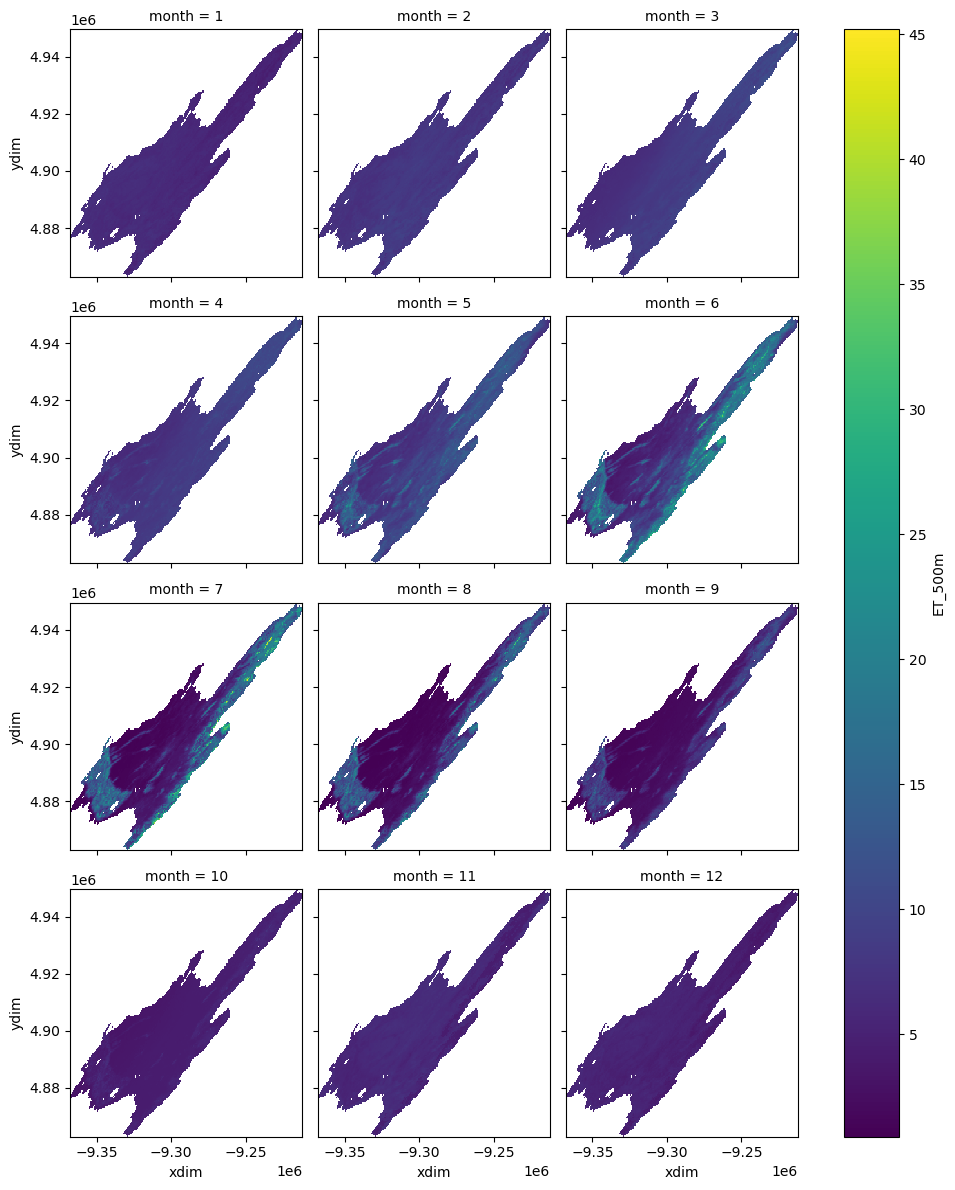

In [6]:
## visualize annual rends by month ##
annual_trends = lbrb_modet['ET_500m'].groupby('time.month').median().plot(x='xdim', y='ydim', col='month',col_wrap=3)
print(annual_trends)

In [7]:
## get string of years  ##
year_nums = np.arange(2001, 2023,1)
year_str = year_nums.astype(str)
year_str

array(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022'], dtype='<U11')

In [8]:
## Group ET by day ##
daily_et = lbrb_modet['ET_500m'].groupby('time')
timesteps = list(daily_et.groups.keys()) #get list of timesteps
timesteps[1]

## take daily averages ##
daily_mean_et = []
for i in range(len(timesteps)):
    day_mean = daily_et[timesteps[i]].mean().values
    daily_mean_et.append(day_mean)

In [9]:
## Group ET by day ##
daily_pet = lbrb_modet['PET_500m'].groupby('time')

#take daily averages
daily_mean_pet = []
for i in range(len(timesteps)):
    day_mean = daily_pet[timesteps[i]].mean().values
    daily_mean_pet.append(day_mean)

In [10]:
## build dataframe from daily ET data ## 
daily_mean_et_df = pd.DataFrame({'date': timesteps, 'mean_et_kg/m^2/day': daily_mean_et, 'mean_pet_kg/m^2/day': daily_mean_pet})
daily_mean_et_df

,date,mean_et_kg/m^2/day,mean_pet_kg/m^2/day
0,2000-01-01,5.1798534,35.1803
1,2000-01-09,6.0104547,36.52771
2,2000-01-17,6.9607863,38.479866
3,2000-01-25,7.600873,39.13007
4,2000-02-02,10.53965,47.08373
...,...,...,...
1099,2023-11-25,5.2833095,37.558754
1100,2023-12-03,6.031435,37.33759
1101,2023-12-11,6.086441,37.20289
1102,2023-12-19,6.613162,38.382362


In [11]:
## export ET dataframe ##
daily_mean_et_df.to_csv('data/Payette_ET.csv', index = False)